In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv


# Assignment Details
You are required to explore and work with two different datasets to apply Logistic Regression and Multinomial Logistic Regression. The objective is to understand how Logistic Regression works for binary classification problems and how Multinomial Logistic Regression is used for multiclass (more than two classes) classification. Additionally, evaluate the models' performance using appropriate metrics.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Loading Dataset

In [3]:
df = pd.read_csv("/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv")

In [4]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# Data Preprocessing 

In [5]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [6]:
df.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

In [7]:
df['Personality'].isnull().sum()

0

In [8]:
x = df.drop("Personality", axis=1)
y = df['Personality']

In [9]:
x

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,No,4.0,6.0,No,13.0,5.0
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0
3,0.0,No,6.0,7.0,No,14.0,8.0
4,3.0,No,9.0,4.0,No,8.0,5.0
...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0
2896,3.0,No,8.0,3.0,No,14.0,9.0
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0


In [10]:
y

0       Extrovert
1       Introvert
2       Introvert
3       Extrovert
4       Extrovert
          ...    
2895    Extrovert
2896    Extrovert
2897    Introvert
2898    Introvert
2899    Extrovert
Name: Personality, Length: 2900, dtype: object

In [11]:
y.unique()

array(['Extrovert', 'Introvert'], dtype=object)

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
dtypes: float64(5), object(2)
memory usage: 158.7+ KB


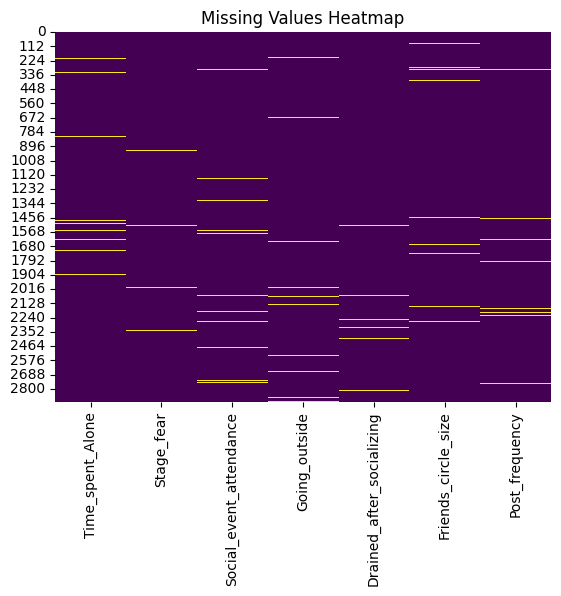

In [15]:
sns.heatmap(x.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [16]:
x.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
dtype: int64

In [18]:
x.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
dtype: object

In [17]:
x['Time_spent_Alone'].skew()

0.38582142719550133

In [22]:
columns = x.columns.to_list()
columns

['Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency']

In [26]:
# Set skewness threshold for "normal" distribution
skew_threshold = 0.5

# Loop through each selected column
for col in columns:
    if x[col].dtype == 'object':
        # For categorical columns, fill with mode
        x[col] = x[col].fillna(x[col].mode()[0])
    else:
        # For numeric columns
        skewness = x[col].skew()
        if abs(skewness) < skew_threshold:
            x[col] = x[col].fillna(x[col].mean())
        else:
            x[col] = x[col].fillna(x[col].median())


In [27]:
x.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64

In [28]:
x.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
dtype: object

In [29]:
x

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,No,4.0,6.0,No,13.0,5.0
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0
3,0.0,No,6.0,7.0,No,14.0,8.0
4,3.0,No,9.0,4.0,No,8.0,5.0
...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0
2896,3.0,No,8.0,3.0,No,14.0,9.0
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0


In [31]:
x.shape

(2900, 7)

In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = encoder.fit_transform(x[col])

In [35]:
x

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,0,4.0,6.0,0,13.0,5.0
1,9.0,1,0.0,0.0,1,0.0,3.0
2,9.0,1,1.0,2.0,1,5.0,2.0
3,0.0,0,6.0,7.0,0,14.0,8.0
4,3.0,0,9.0,4.0,0,8.0,5.0
...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0
2896,3.0,0,8.0,3.0,0,14.0,9.0
2897,4.0,1,1.0,1.0,1,4.0,0.0
2898,11.0,1,1.0,3.0,1,2.0,0.0


In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [38]:
x_train

array([[-0.43747578, -0.97278401,  0.36375899, ..., -0.97278401,
         0.88936702,  1.87650481],
       [ 0.4346491 ,  1.02797743, -0.33232739, ...,  1.02797743,
        -1.24218755, -1.22935334],
       [ 1.59748226,  1.02797743, -0.68037058, ...,  1.02797743,
        -1.24218755, -1.22935334],
       ...,
       [ 1.88819055,  1.02797743, -1.02841377, ...,  1.02797743,
        -0.53166936, -0.53916264],
       [ 1.59748226,  1.02797743, -0.33232739, ...,  1.02797743,
        -0.29482996, -1.22935334],
       [-0.14676749,  1.02797743, -0.68037058, ...,  1.02797743,
        -0.76850876, -0.88425799]])

In [39]:
x_test

array([[ 1.59748226e+00,  1.02797743e+00, -3.32327390e-01, ...,
         1.02797743e+00, -2.94829964e-01, -1.94067286e-01],
       [ 2.77420718e-04, -9.72784007e-01,  2.96157257e-03, ...,
        -9.72784007e-01,  1.83672460e+00,  4.96123414e-01],
       [ 1.43940806e-01,  1.02797743e+00, -1.37645695e+00, ...,
         1.02797743e+00, -1.47902695e+00, -5.39162636e-01],
       ...,
       [ 1.30677397e+00,  1.02797743e+00, -6.80370578e-01, ...,
         1.02797743e+00, -1.00534815e+00, -1.22935334e+00],
       [-7.28184067e-01, -9.72784007e-01,  3.63758986e-01, ...,
        -9.72784007e-01,  1.36304581e+00,  1.53140946e+00],
       [ 1.30677397e+00,  1.02797743e+00, -1.37645695e+00, ...,
         1.02797743e+00, -1.24218755e+00, -1.22935334e+00]])

In [40]:
from sklearn.linear_model import LogisticRegression 

blg = LogisticRegression()
blg.fit(x_train, y_train)

LogisticRegression()

In [45]:
from sklearn.metrics import classification_report

y_pred_train = blg.predict(x_train)

print("Result on Training Dataset")
print(classification_report(y_train, y_pred_train))

Result on Training Dataset
              precision    recall  f1-score   support

   Extrovert       0.92      0.93      0.92      1189
   Introvert       0.92      0.92      0.92      1131

    accuracy                           0.92      2320
   macro avg       0.92      0.92      0.92      2320
weighted avg       0.92      0.92      0.92      2320



In [41]:
y_pred = blg.predict(x_test)
y_pred

array(['Introvert', 'Extrovert', 'Introvert', 'Introvert', 'Introvert',
       'Introvert', 'Introvert', 'Extrovert', 'Introvert', 'Introvert',
       'Extrovert', 'Extrovert', 'Introvert', 'Introvert', 'Extrovert',
       'Introvert', 'Introvert', 'Extrovert', 'Extrovert', 'Introvert',
       'Extrovert', 'Introvert', 'Introvert', 'Extrovert', 'Extrovert',
       'Introvert', 'Introvert', 'Introvert', 'Introvert', 'Extrovert',
       'Extrovert', 'Extrovert', 'Introvert', 'Introvert', 'Introvert',
       'Extrovert', 'Extrovert', 'Extrovert', 'Extrovert', 'Introvert',
       'Extrovert', 'Extrovert', 'Introvert', 'Introvert', 'Extrovert',
       'Introvert', 'Introvert', 'Introvert', 'Extrovert', 'Extrovert',
       'Extrovert', 'Extrovert', 'Extrovert', 'Introvert', 'Extrovert',
       'Introvert', 'Extrovert', 'Extrovert', 'Extrovert', 'Introvert',
       'Extrovert', 'Extrovert', 'Introvert', 'Introvert', 'Introvert',
       'Introvert', 'Extrovert', 'Extrovert', 'Extrovert', 'Intr

In [43]:
from sklearn.metrics import classification_report
print("Result on Testing Dataset")
print(classification_report(y_test, y_pred))

Result on Testing Dataset
              precision    recall  f1-score   support

   Extrovert       0.92      0.92      0.92       302
   Introvert       0.91      0.92      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580

